In [3]:
import numpy as np
import matplotlib.pyplot as plt
import librosa as lr
from IPython.display import Audio

def midi_to_frequency(p):
    return 440 * 2 ** ((p - 69) / 12)

def f_coef(k, sr, window_size):
    return sr * k / window_size

def ks_in_dft(p, window_size, sr):

    f_coefs = f_coef(k=np.arange(0, window_size // 2), sr=sr, window_size=window_size)

    ks = np.array([], dtype=int)

    for k, f in enumerate(f_coefs):
        if (f > midi_to_frequency(p - 0.5) and (f < midi_to_frequency(p + 0.5))):
            ks = np.append(ks, k)
    
    return ks

def logfreq_from_stft(stft, sr, window_size):

    logfreq = np.zeros((128, stft.shape[1]))

    for p in range(128):
    
        ks = ks_in_dft(p, window_size, sr)
    
        for k in ks:
            logfreq[p] = logfreq[p] + stft[k]
    
    return logfreq

def calc_logfreq(x, sr, window_size):

    stft = lr.stft(x, n_fft=window_size)

    return logfreq_from_stft(np.abs(stft), sr, window_size)

## Load Audio

In [ ]:
!curl https://cdn.freesound.org/previews/94/94812_29541-lq.mp3 -o piano_scale.mp3

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 78792  100 78792    0     0   130k      0 --:--:-- --:--:-- --:--:--  131k


/Users/danielhopfner/miniconda3/lib/python3.9/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


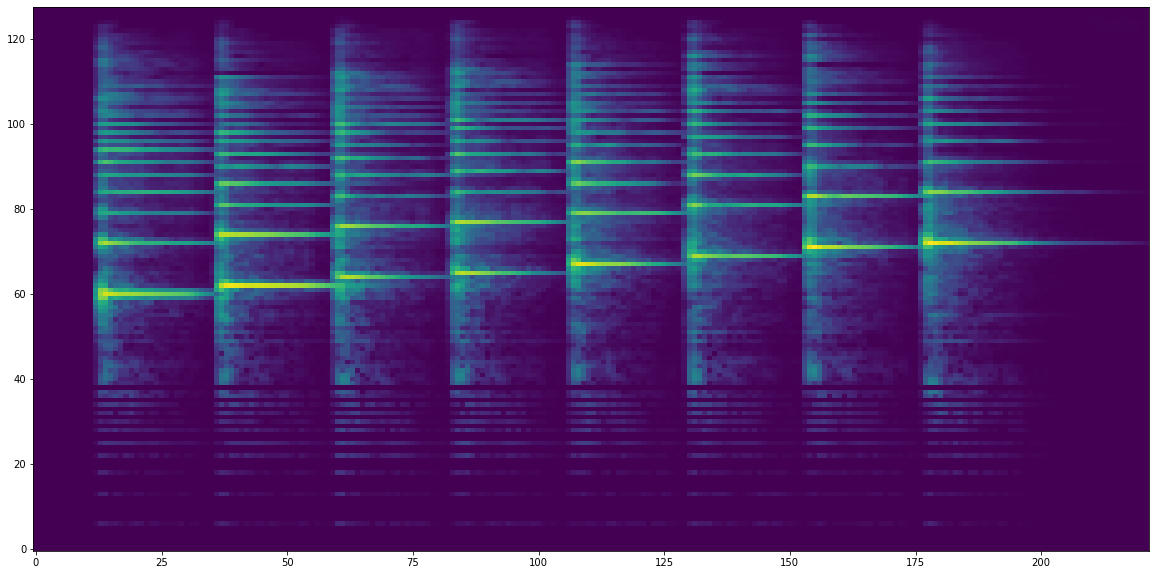

In [4]:
x, sr = lr.load('piano_scale.mp3', sr=None) # sr=None for file-based sr

display(Audio(x, rate=sr))

window_size = 4096

logfreq = calc_logfreq(x, sr, window_size)

gamma = 1
plt.figure(figsize=(20, 10))
plt.imshow(np.log10(1 + logfreq * gamma), origin='lower', aspect='auto')
plt.show()

# Chromagramm

Das sog. Chromagramm kann vom Logarithmus-Frequenz-skalierten Spektrogramm abgeleitet werden. Im Gegensatz zum Log-Freq-Spektrogramm enthält das Chromagramm typischerweise nur 12 Zeilen, die jeweils den 12 [Tonhöhenklassen](https://de.wikipedia.org/wiki/Tonhöhenklasse) unseres westlichen temperierten Stimmungssystems entsprechen (die Oktaven-Information wird also "weg-abstrahiert").

<br/>
<div style="background-color:lightyellow;border: solid grey; margin: 10px">

<b>Aufgabe:</b> Ausgehend von einem Log-Freq-skalierten Spektrogramm: Konstruiert ein Chromagramm mit den folgenden Schritten:
    
1. Schreibt eine Funktion namens `chroma_from_logfreq`, die als Argument ein `logfreq`-Spektrogramm bekommt.
2. Erstellt ein temporäres Array namens `chroma` mit Nullen mit dem richtigen Shape:
    1. richtige Anzahl an Zeilen (siehe oben)
    2. Anzahl der Frames von logfreq übernehmen
3. Addiert in einem Loop über alle Pitches im Log-Freq-Spektrogramm jede Oktave aller 12 Tonhöhenklassen auf (Modulo-Operation für Indizes wird hier sehr hilfreich sein).

</div>

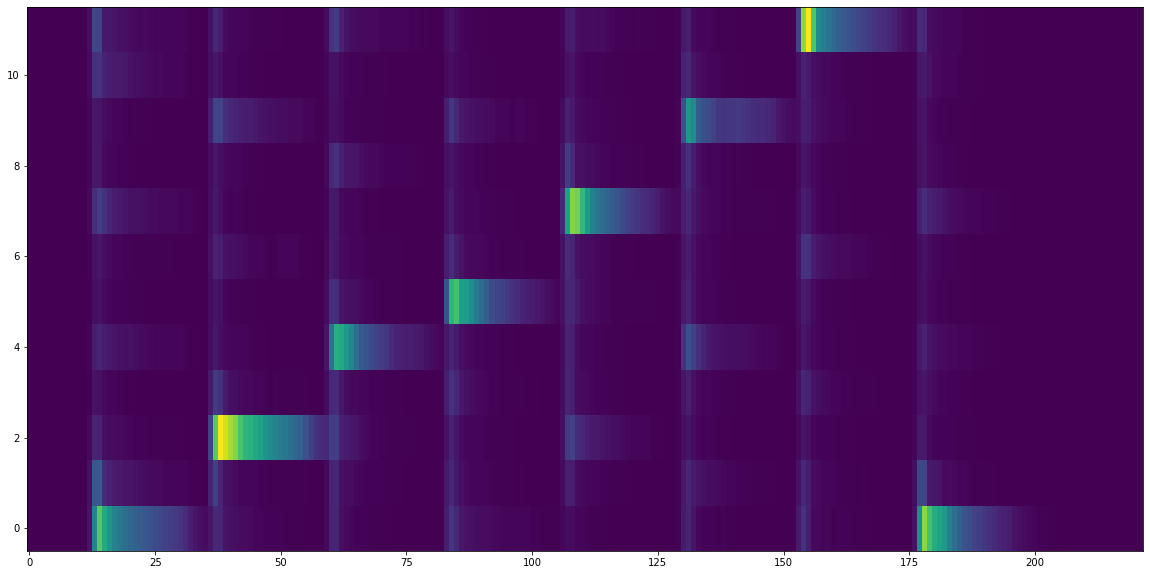

In [6]:
def chroma_from_logfreq(logfreq):
    
    chroma = np.zeros((12, logfreq.shape[1]))
    
    for p in range(128):
        chroma[p % 12] = chroma[p % 12] + logfreq[p]

    return chroma

chroma = chroma_from_logfreq(logfreq)

gamma = 1
plt.figure(figsize=(20, 10))
plt.imshow(chroma, aspect='auto', origin='lower')
plt.show()